In [ ]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import numpy.random as r
import matplotlib.pyplot as plt

(1797, 64)


<Figure size 640x480 with 0 Axes>

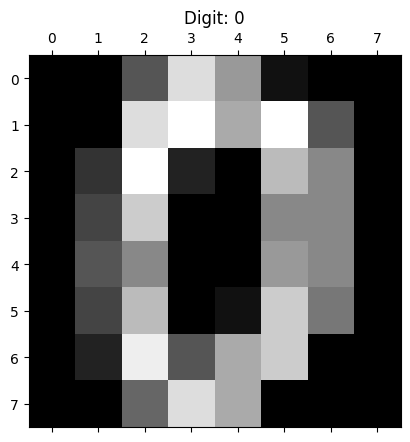

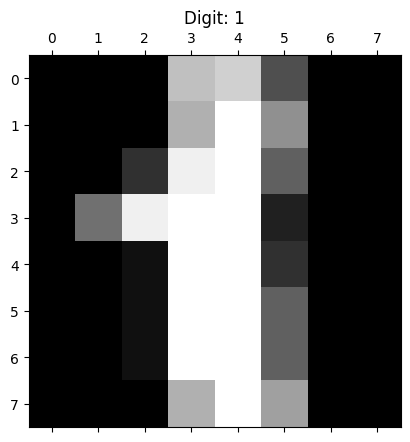

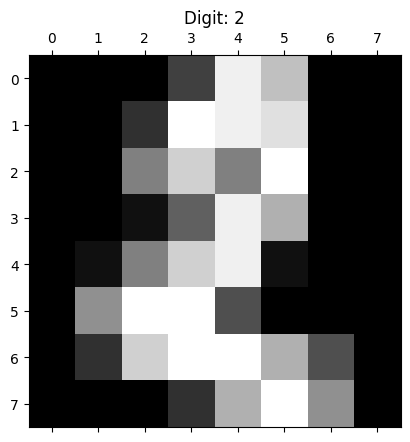

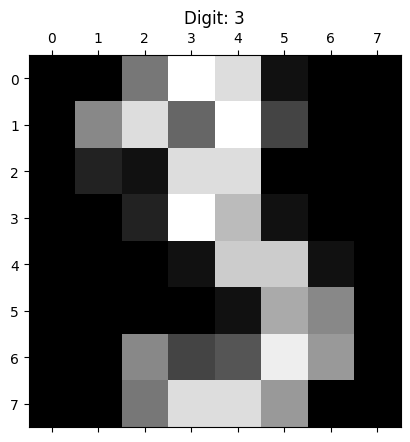

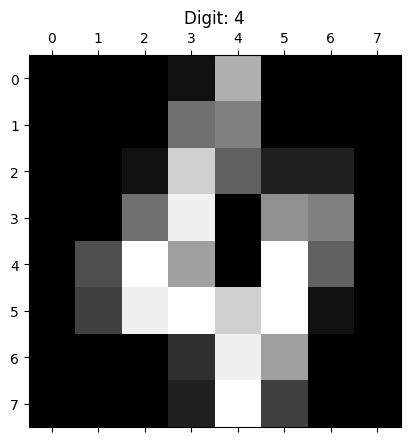

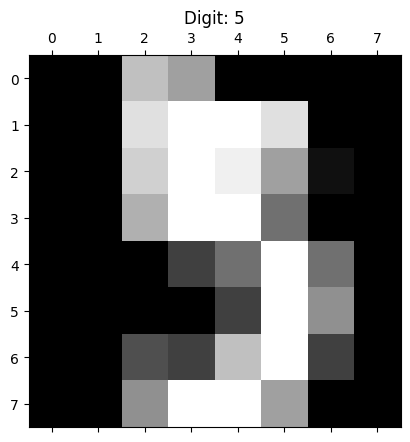

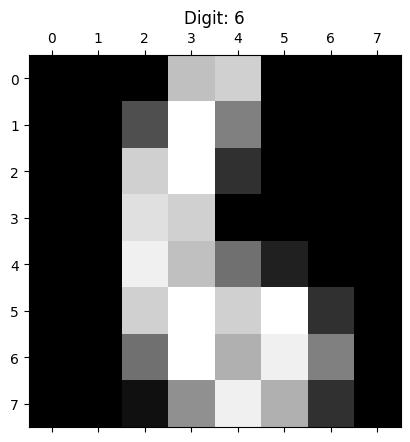

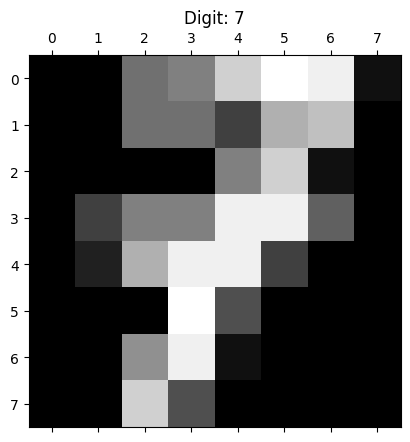

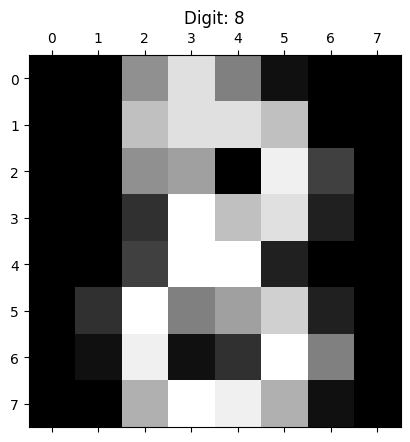

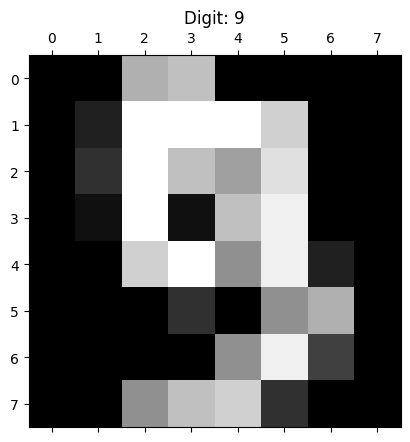

In [ ]:
digits = load_digits()
print(digits.data.shape)

data = digits.data
target = digits.target

plt.gray()
for i in range(10):
  plt.matshow(digits.images[i])
  plt.title("Digit: " + str(i))


In [ ]:
def one_hot_encode(y):

  # get classes (i.e. 0, 1, 2, etc) in y and assign an index to them
  classes = np.unique(y)
  class_to_index = {category: index for index, category in enumerate(classes)}

  # initialize empty array to hold one-hot encoded vectors
  y_one_hot = np.zeros((len(y), len(classes)))

  # for loop to iterate over classes and assign 1 to the respective index in the respective y vector
  for i, classes in enumerate(y):
    index = class_to_index[classes]
    y_one_hot[i][index] = 1

  return y_one_hot

In [ ]:
# activation functions and their derivatives

# define sigmoid activation function
def sigmoid(z):
  return 1.0 / (1.0 + np.exp(-z))

def sigmoid_derivative(z):
  return sigmoid(z) * (1 - sigmoid(z))

# define tanh activation function
def tanh(x):
  return np.tanh(x)

def tanh_derivative(x):
  t = tanh(x)
  return 1 - t**2

# define relu activation function
def relu(x):
  return np.maximum(0, x)

def relu_derivative(x):
  return (x > 0).astype(int)

In [ ]:
# function to initialize weights and biases depending on network architecture
def initialize_W_and_b(layer_sizes):
    num_layers = len(layer_sizes)
    biases = []
    weights = []

    for i in range(1, num_layers):
        prev_layer_size = layer_sizes[i-1]
        curr_layer_size = layer_sizes[i]

        # initialize biases for current layer
        bias = np.random.randn(1, curr_layer_size)
        biases.append(bias)

        # initialize weights for current layer
        weight = np.random.randn(prev_layer_size, curr_layer_size)
        weights.append(weight)

    return weights, biases

In [ ]:
# define forward function
def forward(x, w1, b1, w2, b2, activation):
  z1 = np.dot(x, w1) + b1
  if activation == 'sigmoid':
      a1 = sigmoid(z1)
  elif activation == 'relu':
      a1 = relu(z1)
  elif activation == 'tanh':
      a1 = tanh(z1)
  else:
      raise ValueError("Activation function must be 'sigmoid', 'relu', or 'tanh'")
  z2 = np.dot(a1, w2) + b2
  if activation == 'sigmoid':
      a2 = sigmoid(z2)
  elif activation == 'relu':
      a2 = relu(z2)
  elif activation == 'tanh':
      a2 = tanh(z2)
  else:
      raise ValueError("Activation function must be 'sigmoid', 'relu', or 'tanh'")
  return a2, (z1, a1, z2) #returning the rest as a list as for prediction using test set, we only would need a2


In [ ]:
# define backpropagation function
def backpropagation(x, y, a2, other_stuff, w2, activation):
    z1, a1, z2 = other_stuff
    if activation == 'sigmoid':
        delta2 = (a2 - y) * sigmoid_derivative(z2)
        delta1 = np.dot(delta2, w2.T) * sigmoid_derivative(z1)
    elif activation == 'relu':
        delta2 = (a2 - y) * relu_derivative(z2)
        delta1 = np.dot(delta2, w2.T) * relu_derivative(z1)
    elif activation == 'tanh':
        delta2 = (a2 - y) * tanh_derivative(z2)
        delta1 = np.dot(delta2, w2.T) * tanh_derivative(z1)
    else:
        raise ValueError("Activation function must be 'sigmoid', 'relu', or 'tanh'")
    dEdW2 = np.dot(a1.T, delta2) * 2 / y.shape[0]
    dEdB2 = np.sum(delta2, axis=0, keepdims=True) * 2 / y.shape[0]
    dEdW1 = np.dot(x.T, delta1) * 2 / y.shape[0]
    dEdb1 = np.sum(delta1, axis=0, keepdims=True) * 2 / y.shape[0]
    return dEdW1, dEdb1, dEdW2, dEdB2

In [ ]:
def train(epochs, activFunction, w1, w2, b1, b2, learn_rate, x_train, y_train, batches):
  totalLoss = 0

  for epoch in range(epochs):

    # shuffle the training data
    indices = np.arange(x_train.shape[0])
    np.random.shuffle(indices)
    Xtrain = x_train[indices]
    ytrain = y_train[indices]

    # iterate over mini-batches
    for i in range(0, Xtrain.shape[0], batches):
      x = Xtrain[i:i+batches]
      y = ytrain[i:i+batches]

      # forward pass to get yhat(a2) and other inputs and outputs of layers
      a2, other_stuff = forward(x, w1, b1, w2, b2, activFunction)

      # calculate mse loss
      loss = np.mean((a2 - y)**2)

      # calculate gradients using backpropagation
      gradients = backpropagation(x, y, a2, other_stuff, w2, activFunction)

      # update weights and biases using gradients and learning rate
      w1 -= learn_rate * gradients[0]
      b1 -= learn_rate * gradients[1]
      w2 -= learn_rate * gradients[2]
      b2 -= learn_rate * gradients[3]

    # print("Epoch %d: loss = %.4f, train_accuracy = %.2f%%" % (epoch+1, loss, (1-loss)*100))
    totalLoss += loss
  return totalLoss

In [ ]:
digits = load_digits()

data = digits.data
target = digits.target

# setting X and y to data and target
X = data
y = target

# scaling the data
scaler = StandardScaler()
scale = StandardScaler()
X_s = scale.fit_transform(X)

y_hot = one_hot_encode(y)
# splitting them
Xtrain, Xtest, ytrain, ytest = train_test_split(X_s, y_hot, random_state = 10)

In [ ]:
# set network architecture
input_size = 64
hidden_size = 30
output_size = 10
layers = [input_size, hidden_size, output_size]

# set hyperparameters
learning_rate = 0.1
num_epochs = 500
activation = ['sigmoid', 'relu', 'tanh']
batch_size = 33  # size of each mini-batch

# train over different activation function:
for activeFunc in activation:

  # initialize weights and biases
  W, b = initialize_W_and_b(layers)

  w1, w2 = W[0], W[1]
  b1, b2 = b[0], b[1]

  print("\nFor Activation Function: ", activeFunc)
  loss_sum = train(num_epochs, activeFunc, w1, w2, b1, b2, learning_rate, Xtrain, ytrain, batch_size)
  print("Training completed! Avg Train Accuracy for %d epochs: %.4f%%" % (num_epochs, (1 - loss_sum/num_epochs) * 100))


  # calculate accuracy on test set
  a2, _ = forward(Xtest, w1, b1, w2, b2, activeFunc)

  predictions = np.argmax(a2, axis=1)
  ytest_actual = np.argmax(ytest, axis=1)

  print("\n---TESTING---\n")
  accuracy = np.mean(predictions == ytest_actual)
  print("test_accuracy = %.2f%%" % (accuracy*100))
  print("\n-------------\n")




For Activation Function:  sigmoid
Training completed! Avg Train Accuracy for 500 epochs: 98.3573%

---TESTING---

test_accuracy = 93.78%

-------------


For Activation Function:  relu
Training completed! Avg Train Accuracy for 500 epochs: 90.0000%

---TESTING---

test_accuracy = 10.22%

-------------


For Activation Function:  tanh
Training completed! Avg Train Accuracy for 500 epochs: 94.4481%

---TESTING---

test_accuracy = 93.11%

-------------



## **Varying HyperParameters: Epochs**

In [ ]:
# set network structure
input_size = 64
hidden_size = 30
output_size = 10
layers = [input_size, hidden_size, output_size]

# set hyperparameters
learning_rate = 0.1
num_epochs = [500, 1000, 1500, 2000, 2500]
activation = ['sigmoid', 'relu', 'tanh']
batch_size = 33  # size of each mini-batch

# train over different activation function and epochs:
for e in range(len(num_epochs)):
  print("---------For # epochs:", num_epochs[e], "---------\n")
  for activeFunc in activation:

    # initialize weights and biases
    W, b = initialize_W_and_b(layers)

    w1, w2 = W[0], W[1]
    b1, b2 = b[0], b[1]

    print("\nFor Activation Function: ", activeFunc)
    loss_sum = train(num_epochs[e], activeFunc, w1, w2, b1, b2, learning_rate, Xtrain, ytrain, batch_size)
    print("Training completed! Avg Train Accuracy for %d epochs: %.4f%%" % (num_epochs[e], (1 - loss_sum/num_epochs[e]) * 100))


    # calculate accuracy on test set
    a2, _ = forward(Xtest, w1, b1, w2, b2, activeFunc)

    predictions = np.argmax(a2, axis=1)
    ytest_actual = np.argmax(ytest, axis=1)

    print("\n---TESTING---\n")
    accuracy = np.mean(predictions == ytest_actual)
    print("test_accuracy = %.2f%%" % (accuracy*100))
    print("\n-------------\n")



---------For # epochs: 500 ---------


For Activation Function:  sigmoid
Training completed! Avg Train Accuracy for 500 epochs: 96.9787%

---TESTING---

test_accuracy = 82.44%

-------------


For Activation Function:  relu
Training completed! Avg Train Accuracy for 500 epochs: 90.0000%

---TESTING---

test_accuracy = 10.22%

-------------


For Activation Function:  tanh
Training completed! Avg Train Accuracy for 500 epochs: 94.5546%

---TESTING---

test_accuracy = 91.78%

-------------

---------For # epochs: 1000 ---------


For Activation Function:  sigmoid
Training completed! Avg Train Accuracy for 1000 epochs: 97.2998%

---TESTING---

test_accuracy = 82.00%

-------------


For Activation Function:  relu
Training completed! Avg Train Accuracy for 1000 epochs: 90.0000%

---TESTING---

test_accuracy = 10.22%

-------------


For Activation Function:  tanh
Training completed! Avg Train Accuracy for 1000 epochs: 95.8876%

---TESTING---

test_accuracy = 91.11%

-------------

--------

## **Varying HyperParameters: Learning Rate**

In [ ]:
# set network structure
input_size = 64
hidden_size = 30
output_size = 10
layers = [input_size, hidden_size, output_size]

# set hyperparameters
learning_rate = [0.1, 0.01, 0.001, 0.0001]
num_epochs = 1500
activation = ['sigmoid', 'relu', 'tanh']
batch_size = 33  # size of each mini-batch

# train over different activation function and epochs:
for eta in range(len(learning_rate)):
  print("---------For Learning Rate:", learning_rate[eta], "---------\n")
  for activeFunc in activation:

    # initialize weights and biases
    W, b = initialize_W_and_b(layers)

    w1, w2 = W[0], W[1]
    b1, b2 = b[0], b[1]

    print("\nFor Activation Function: ", activeFunc)
    loss_sum = train(num_epochs, activeFunc, w1, w2, b1, b2, learning_rate[eta], Xtrain, ytrain, batch_size)
    print("Training completed! Avg Train Accuracy for %d epochs: %.4f%%" % (num_epochs, (1 - loss_sum/num_epochs) * 100))


    # calculate accuracy on test set
    a2, _ = forward(Xtest, w1, b1, w2, b2, activeFunc)

    predictions = np.argmax(a2, axis=1)
    ytest_actual = np.argmax(ytest, axis=1)

    print("\n---TESTING---\n")
    accuracy = np.mean(predictions == ytest_actual)
    print("test_accuracy = %.2f%%" % (accuracy*100))
    print("\n-------------\n")



---------For Learning Rate: 0.1 ---------


For Activation Function:  sigmoid
Training completed! Avg Train Accuracy for 1500 epochs: 99.4182%

---TESTING---

test_accuracy = 95.33%

-------------


For Activation Function:  relu
Training completed! Avg Train Accuracy for 1500 epochs: 90.0000%

---TESTING---

test_accuracy = 10.22%

-------------


For Activation Function:  tanh
Training completed! Avg Train Accuracy for 1500 epochs: 96.7568%

---TESTING---

test_accuracy = 92.44%

-------------

---------For Learning Rate: 0.01 ---------


For Activation Function:  sigmoid
Training completed! Avg Train Accuracy for 1500 epochs: 95.4145%

---TESTING---

test_accuracy = 79.78%

-------------


For Activation Function:  relu
Training completed! Avg Train Accuracy for 1500 epochs: 90.0283%

---TESTING---

test_accuracy = 11.11%

-------------


For Activation Function:  tanh
Training completed! Avg Train Accuracy for 1500 epochs: 87.7704%

---TESTING---

test_accuracy = 89.56%

----------

## **Findings**
### Sigmoid activation function performed better than the others on average, tanh was a close second. ReLu was horrible. The best hyperparameters found were 1500 epochs with a learning rate of 0.1